In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd

In [12]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


In [14]:
mouse_metadata_path

'data/Mouse_metadata.csv'

In [16]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [18]:
mouse_metadata.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [20]:
#
merged_data = study_results.merge(mouse_metadata, left_on = 'Mouse ID', right_on='Mouse ID')

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# count unique mice IDs
merged_data["Mouse ID"].nunique()

249

In [24]:
# check for duplicates
duplicates = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep= False)]

duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [28]:
merged_data[merged_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# created a cleaned df without the g989 id

In [34]:
cleaned_df = merged_data.drop(merged_data[merged_data["Mouse ID"] == "g989"].index)
cleaned_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
#count the unique mice IDs from the new DataFrame
total_unique_mice = cleaned_df["Mouse ID"].nunique()
total_unique_mice

248

#### Statistical Summary

In [45]:
#created DataFrame for statistics summary
statistics_summary = pd.DataFrame({})
#Grouped the df_cleaned by drug regimen and assigned it to groupby_Drug_Regim
groupby_Drug_Regimen =cleaned_df.groupby(["Drug Regimen"])

#Add a column for each mean, median, var, srd,and sem calculation for tumor volume in the ststatistics_summary DataFrame
statistics_summary["Mean Tumor Volume"] = groupby_Drug_Regimen["Tumor Volume (mm3)"].mean()
statistics_summary["Median Tumor Volume"] = groupby_Drug_Regimen["Tumor Volume (mm3)"].median()
statistics_summary["Tumor Volume Variance"] = groupby_Drug_Regimen["Tumor Volume (mm3)"].var()
statistics_summary["Tumor Volume Std. Dev."]= groupby_Drug_Regimen["Tumor Volume (mm3)"].std()
statistics_summary["Tumor Volume Std. Err."] = groupby_Drug_Regimen["Tumor Volume (mm3)"].apply(st.sem)

#display
statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
statistics_summary2 = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
                        mean='mean', median='median', var='var', std='std', sem='sem')
statistics_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


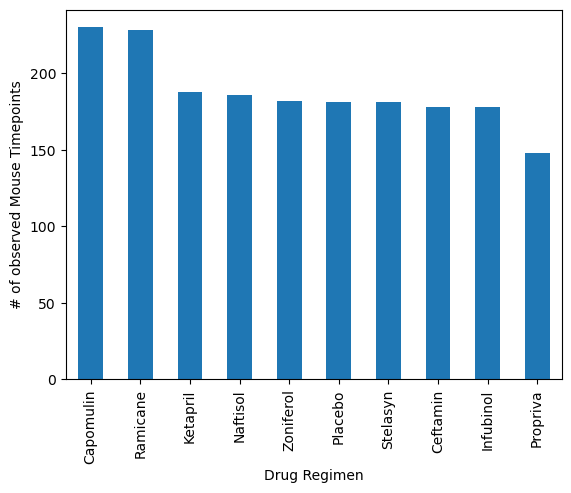

In [49]:
timepoints_count = cleaned_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
#Plot chart using .plot() method
timepoints_count.plot(kind="bar", ylabel="# of observed Mouse Timepoints" )
#Display
plt.show()

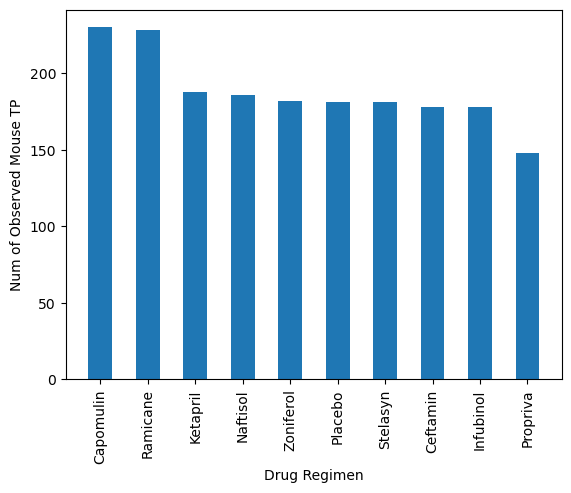

In [53]:
plt.bar(timepoints_count.index, timepoints_count, width = .5)
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Observed Mouse TP")
plt.xticks(rotation = 90)
plt.show()

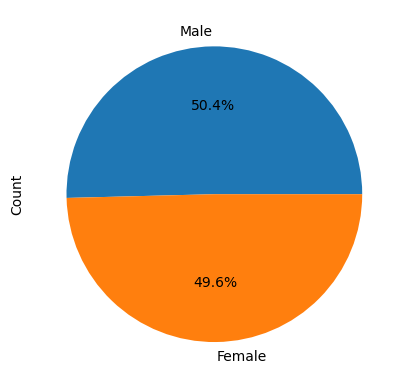

In [55]:
#by gender
mice_by_gender = cleaned_df.groupby("Sex")["Mouse ID"].nunique().sort_values(ascending=False)
mice_by_gender.plot(kind ="pie", autopct = '%1.1f%%', ylabel = 'Count' )
plt.show()

#### Quartiles, Outliers, Boxplots

In [59]:
mice_max_timepoint = cleaned_df.groupby("Mouse ID")["Timepoint"].max()

merged_mice_max_timepoint = pd.merge(cleaned_df, mice_max_timepoint, on=['Mouse ID','Timepoint'], how='inner')

merged_mice_max_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [61]:
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol =[]

#loop through each treatments in treatment_list and get the tumor volumes for each treatment and append it to tumor_vol list
for treatment in treatment_list:
    tumor_vol_data = merged_mice_max_timepoint[merged_mice_max_timepoint["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
    tumor_vol.append(tumor_vol_data)
    
#Loop through each series in tumor_vol and calculate the quartiles and outliers for each series. 
for i, treatments in enumerate(tumor_vol, start =0):
    quartiles = treatments.quantile([0.25, 0.5, 0.75]) #calculate first, second and third quartiles for the series 
    IQR = quartiles[0.75] - quartiles[0.25]         #calculate the IQR

    min_bar = quartiles[0.25] - 1.5 * IQR      #Calculate the minimum
    max_bar = quartiles[0.75] + 1.5 * IQR      #Calculate the maximum 

    outliner = treatments[(treatments < min_bar) | (treatments > max_bar)] #Check for outliner
    print(f'{treatment_list[i]}: Potential outliners: {outliner}') 

Capomulin: Potential outliners: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Potential outliners: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: Potential outliners: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Potential outliners: Series([], Name: Tumor Volume (mm3), dtype: float64)


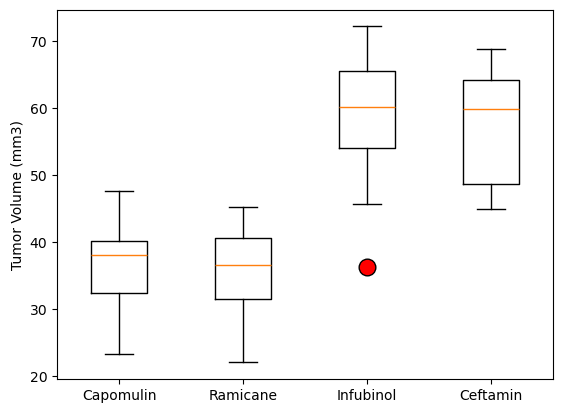

In [63]:
fig, ax = plt.subplots()
ax.boxplot(tumor_vol, tick_labels = treatment_list, flierprops={'markerfacecolor': 'red', 'markersize':'12'})
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

#### Line and Scatter Plot

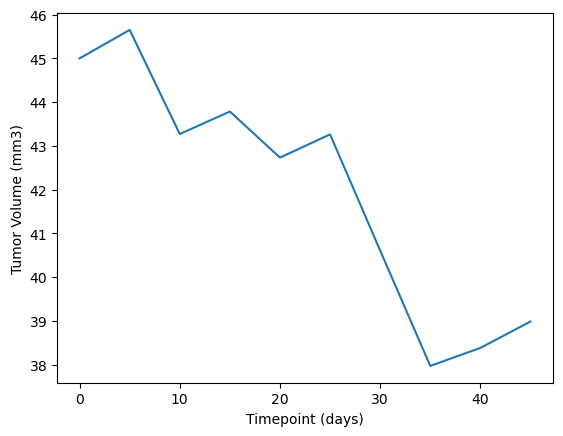

In [68]:
mice_b128 = cleaned_df[cleaned_df["Mouse ID"] == "b128"]
plt.plot(mice_b128["Timepoint"], mice_b128["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

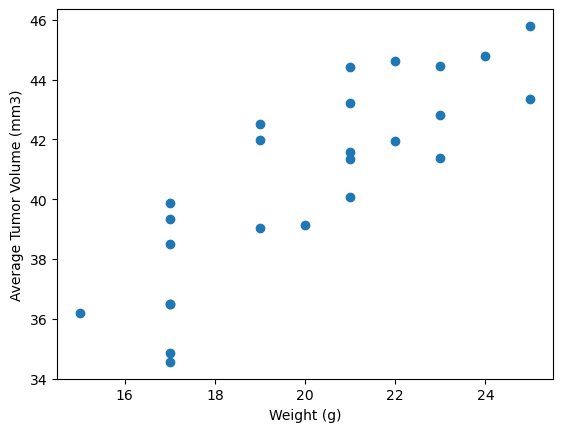

In [70]:
#filter mice with campomulin treatment and cal the mean
campomulin_treated_mice = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
average_tumor_vol= campomulin_treated_mice["Tumor Volume (mm3)"].mean()
mouse_weight= campomulin_treated_mice["Weight (g)"].max()

#scatter plot the mouse weight and average tumor volume
plt.scatter(mouse_weight, average_tumor_vol)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

#### Correlation and Regression

The correlation between mouse wegiht and the average tumor volume is 0.84


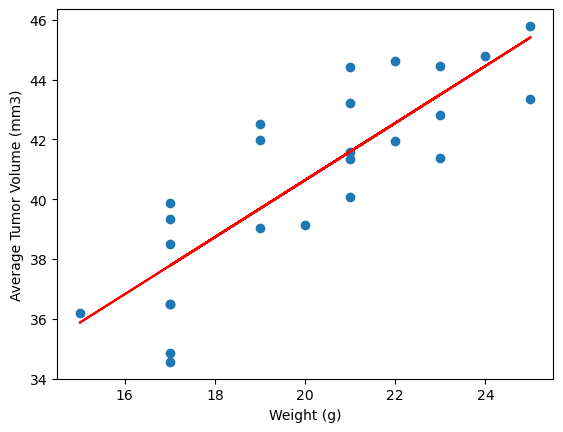

In [73]:
#using scipy calculate the slope, r, and intercept for the mouse weight and average tumor volume
slope, intercept, r, p, std_err = st.linregress(mouse_weight, average_tumor_vol)

#create the y axis value for line chart by multiplying the mouse weight by the slope and adding the intercept
#apply this calculation for every value in mouse_weight
y_axis = list(map((lambda x: slope * x + intercept), mouse_weight))

#scatter plot the mouse_weight vs. average_tumor_vol
plt.scatter(mouse_weight, average_tumor_vol)
#plot the regression line
plt.plot(mouse_weight, y_axis, color= 'red')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

#display the correlation coefficient 'r' 
print(f'The correlation between mouse wegiht and the average tumor volume is {round(r,2)}')
plt.show()